## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 003

## Part A - Cross-validation on Water Sickness Dataset

In [1]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../Data/Sickness04.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Sickness04.csv


In [3]:
sickdf= pd.read_csv(fileFullName,header=0)
print(sickdf.shape)

(442, 11)


In [4]:
sickness_X = sickdf[['F01','F05','F06']].copy(deep=True)
sickness_y = sickdf[['T']].copy(deep=True)
sickness_y.columns = (['T'])

In [5]:
X = np.array(sickness_X[:250])

In [6]:
X.shape

(250, 3)

In [7]:
y = np.array(sickness_y['T'][:250])

In [8]:
y.shape

(250,)

## Part B - Activate Lasso (least absolute shrinkage and selection operator)

In [9]:
lasso = Lasso(random_state=321)

## Part C - Activate GridSearchCV 
### (Exhaustive search over specified parameter values for an estimator)

In [10]:
alphas = np.logspace(-3, -0.75, 50)
#print(alphas)
tuned_parameters = [{'alpha': alphas}]
n_folds = 25

In [11]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, n_jobs=16, verbose=True, return_train_score=True)

## Part D - Fit the data by training the Algoritm

In [12]:
clf.fit(X, y)

Fitting 25 folds for each of 50 candidates, totalling 1250 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 383 tasks      | elapsed:   10.0s
[Parallel(n_jobs=16)]: Done 1250 out of 1250 | elapsed:   14.0s finished


GridSearchCV(cv=25, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=321,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=16,
       param_grid=[{'alpha': array([0.001  , 0.00111, 0.00124, 0.00137, 0.00153, 0.0017 , 0.00189,
       0.0021 , 0.00233, 0.00259, 0.00288, 0.0032 , 0.00356, 0.00395,
       0.00439, 0.00488, 0.00543, 0.00603, 0.00671, 0.00746, 0.00829,
       0.00921, 0.01024, 0.01138, 0.01265, 0.01406, 0.01563, 0.01737...6, 0.07632,
       0.08483, 0.0943 , 0.10481, 0.1165 , 0.12949, 0.14393, 0.15999,
       0.17783])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=None, verbose=True)

## Part E - Plot the results of the search.

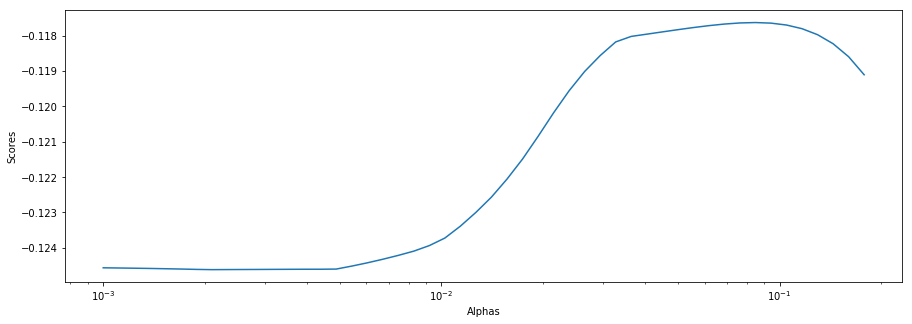

In [13]:
scores = clf.cv_results_['mean_test_score']
fig1 = plt.figure(figsize=(15, 5))
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.semilogx(alphas, scores)
plt.show()

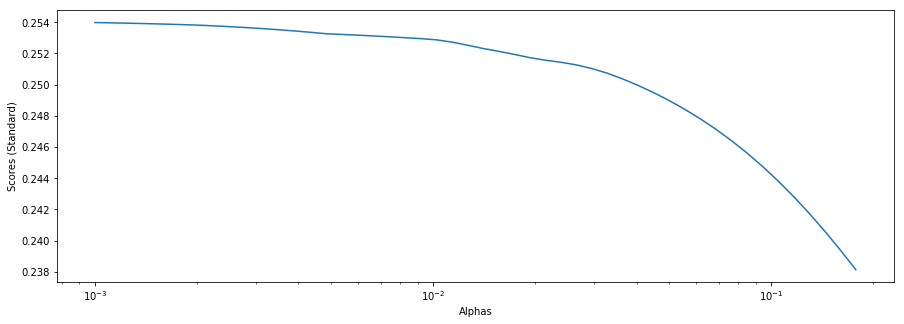

In [14]:
scores_std = clf.cv_results_['std_test_score']
fig2 = plt.figure(figsize=(15, 5))
plt.xlabel('Alphas')
plt.ylabel('Scores (Standard)')
plt.semilogx(alphas, scores_std)
plt.show()

## Part F - Plot error lines showing +/- std. errors of the scores

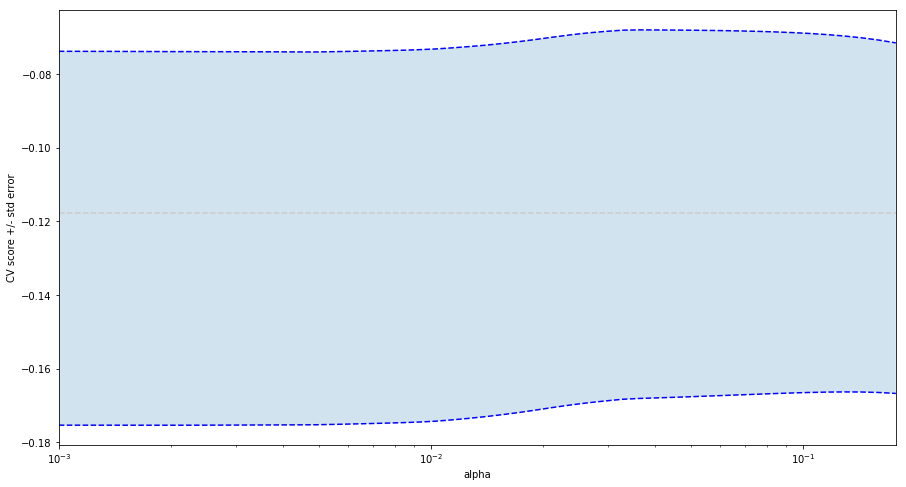

In [15]:
scores_std = clf.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(n_folds)

fig3 = plt.figure(figsize=(15, 8))
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

#alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='0.8')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

## Part G - Question?

Bonus: 

How can you trust the selection of alpha?

To answer this question you use the LassoCV object that sets its alpha parameter automatically from the data by internal cross-validation
(i.e. it performs cross-validation on the training data it receives).

You simply use external cross-validation to observe how much the automatically obtained alphas differ across different cross-validation folds.

In [16]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
k_fold = KFold(n_folds)

In [17]:
print("Answer to the important question:")
print("How can you trust the selection of an alpha?\n")
print("Alpha parameters maximising the generalization score on ")
print("different subsets of the Sickness data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("     [fold {0: 3d}] alpha: {1: 0.5f}, score: {2: 0.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("The simple Answer is:\n")
print("For this example you would not trust alpha since solution obtains different alphas for different")
print("subsets of the data and addisionally the scores for your alphas vary substantially.")

Answer to the important question:
How can you trust the selection of an alpha?

Alpha parameters maximising the generalization score on 
different subsets of the Sickness data:
     [fold   0] alpha:  0.02947, score: -0.28715
     [fold   1] alpha:  0.03276, score:  0.05880
     [fold   2] alpha:  0.01931, score:  0.11514
     [fold   3] alpha:  0.06866, score: -0.00656
     [fold   4] alpha:  0.05000, score: -0.22933
     [fold   5] alpha:  0.05558, score:  0.05195
     [fold   6] alpha:  0.05558, score: -0.28285
     [fold   7] alpha:  0.05000, score: -0.09796
     [fold   8] alpha:  0.05000, score: -0.89133
     [fold   9] alpha:  0.06866, score: -0.10836
     [fold  10] alpha:  0.04047, score: -0.08460
     [fold  11] alpha:  0.04047, score: -0.64245
     [fold  12] alpha:  0.04498, score: -0.18689
     [fold  13] alpha:  0.04047, score: -0.34578
     [fold  14] alpha:  0.06178, score: -0.04005
     [fold  15] alpha:  0.06178, score:  0.03641
     [fold  16] alpha:  0.04498, score:

In [18]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [19]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [20]:
imagename1 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-003-01.jpg'])
fig1.savefig(imagename1, bbox_inches='tight')

In [21]:
imagename2 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-003-02.jpg'])
fig2.savefig(imagename2, bbox_inches='tight')

In [22]:
imagename3 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-003-03.jpg'])
fig3.savefig(imagename3, bbox_inches='tight')

In [23]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-07 13:30:07.164301
